In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_2092\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
data=data.rename({"R&D Spend":"R_D_spend","Administration":"administration","Marketing Spend":"marketing_spend"},axis=1)
data

,R_D_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


C:\Users\HP\AppData\Local\Temp\ipykernel_2092\3219385735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Profit)


<Axes: xlabel='Profit', ylabel='Density'>

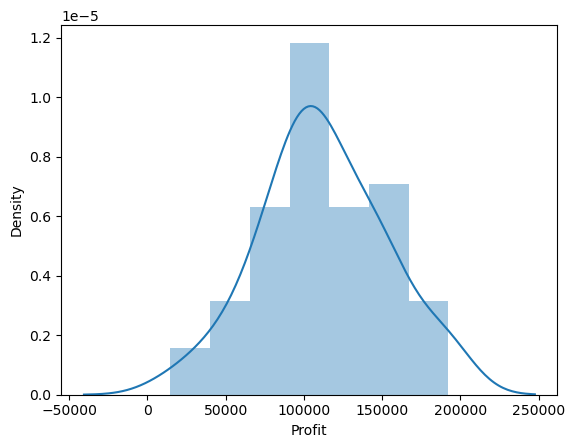

In [12]:
sns.distplot(data.Profit)

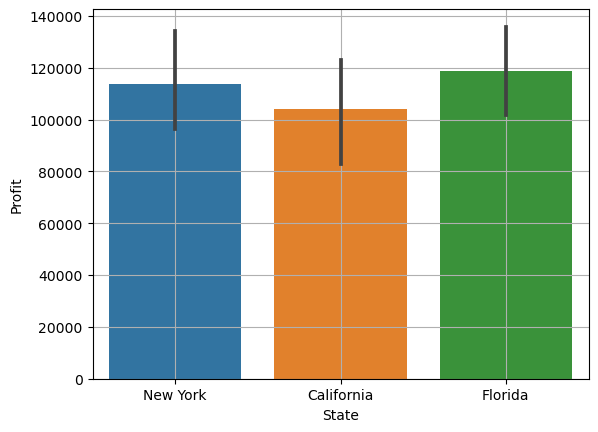

In [11]:
#state wise Profit
sns.barplot(x='State',y='Profit',data=data)
plt.grid(True)
plt.show()

In [13]:
# Converting categorical variable into integer values by dummy variables
state_dummy = pd.get_dummies(data['State'], prefix = 'State')
state_dummy

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [14]:
data=pd.concat([state_dummy,data],axis=1)
data.head()

,State_California,State_Florida,State_New York,R_D_spend,administration,marketing_spend,State,Profit
0,0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,0,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,0,1,0,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
data=data.drop(['State'], axis=1)
data.head()

,State_California,State_Florida,State_New York,R_D_spend,administration,marketing_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [16]:
data=data.rename({"State_New York":"state_newyork","State_Florida":"state_florida","State_California":"state_california"},axis=1)
data.head()

,state_california,state_florida,state_newyork,R_D_spend,administration,marketing_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


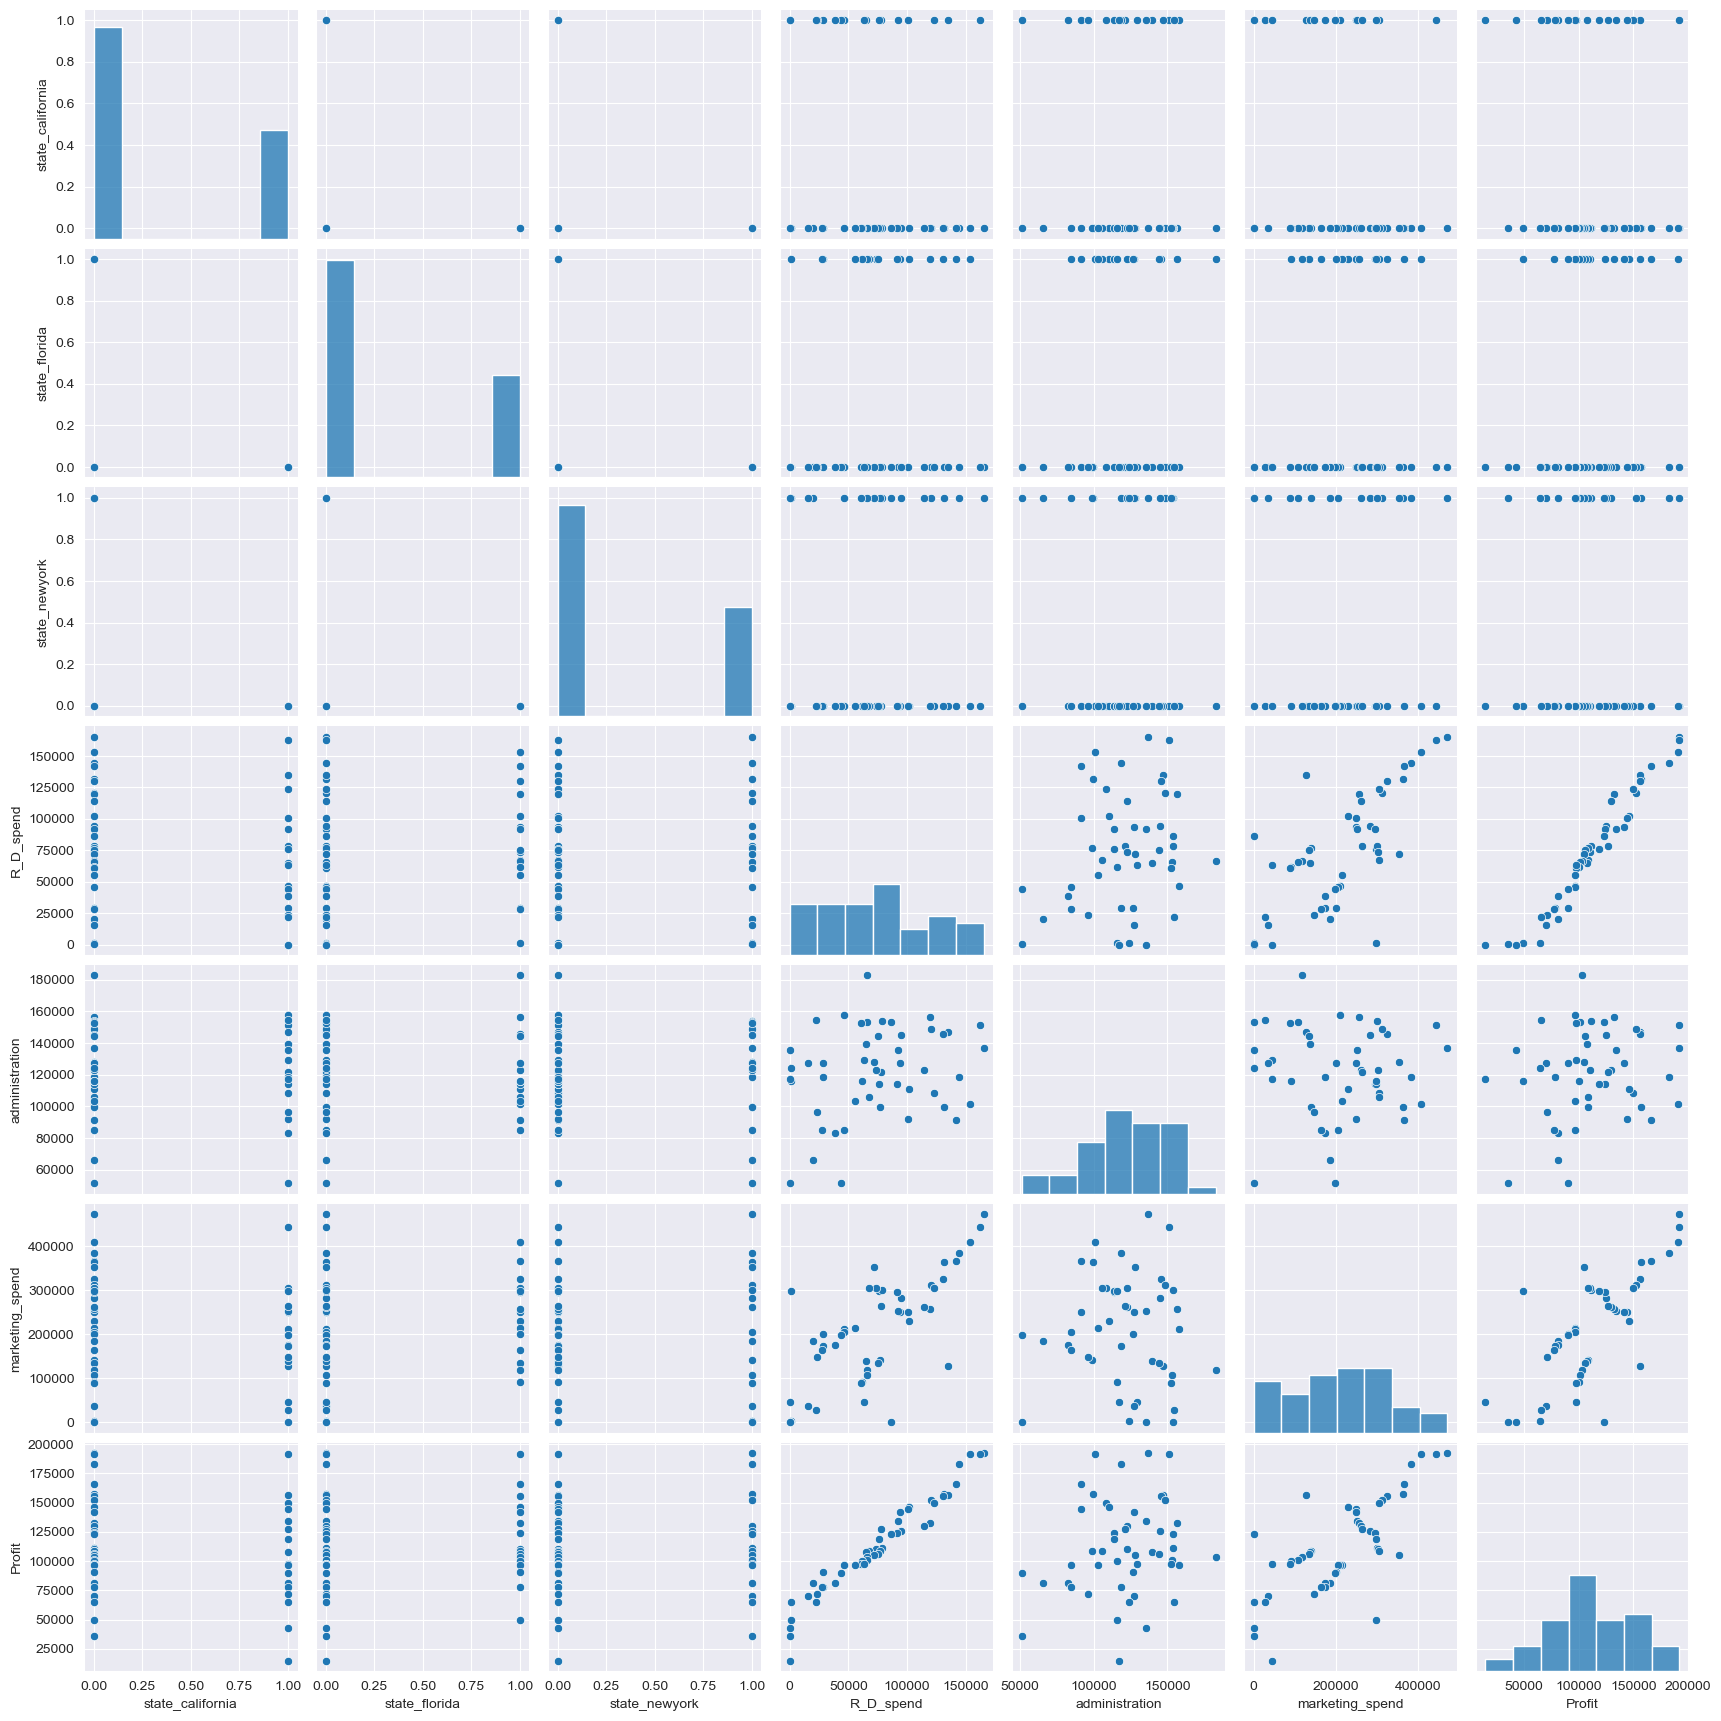

In [17]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

### Correlation Analysis

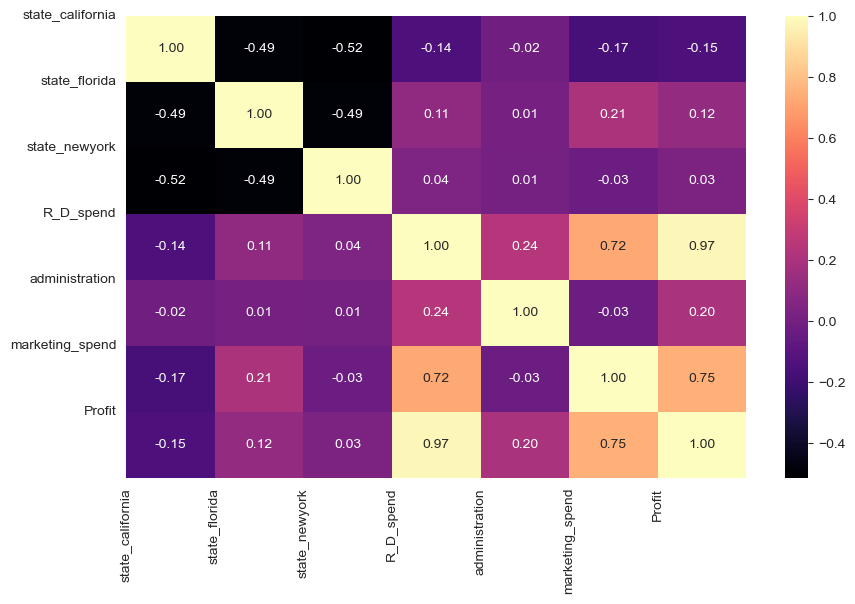

In [18]:
corr=data.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,cmap='magma',annot=True,fmt='.2f')
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [19]:
data.columns

Index(['state_california', 'state_florida', 'state_newyork', 'R_D_spend',
       'administration', 'marketing_spend', 'Profit'],
      dtype='object')

In [20]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~state_california+state_florida++state_newyork+R_D_spend+administration+marketing_spend',data=data).fit()

In [21]:
model.params

Intercept           37633.233316
state_california    12492.110515
state_florida       12690.899308
state_newyork       12450.223496
R_D_spend               0.806023
administration         -0.027004
marketing_spend         0.026980
dtype: float64

In [22]:
#t and p-Values
print('t values')
print(model.tvalues)
print('p values')
print(model.pvalues)

t values
Intercept            7.417409
state_california     5.099242
state_florida        4.654306
state_newyork        5.007401
R_D_spend           17.368580
administration      -0.517012
marketing_spend      1.573889
dtype: float64
p values
Intercept           2.807645e-09
state_california    6.942555e-06
state_florida       2.992503e-05
state_newyork       9.409010e-06
R_D_spend           2.578772e-21
administration      6.077373e-01
marketing_spend     1.226769e-01
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [24]:
# Model Profit~Admin
slr_a=smf.ols("Profit~administration",data=data).fit()
print("tvalue",slr_a.tvalues)
print("pvalue",slr_a.pvalues)
print("R2: ",slr_a.rsquared)
print("R2_Adj: ",slr_a.rsquared_adj)

tvalue Intercept         3.040044
administration    1.419493
dtype: float64
pvalue Intercept         0.003824
administration    0.162217
dtype: float64
R2:  0.04028714077757245
R2_Adj:  0.020293122877105274


In [25]:
# Model Profit~marketing_spend
slr_a=smf.ols("Profit~marketing_spend",data=data).fit()
print("tvalue",slr_a.tvalues)
print("pvalue",slr_a.pvalues)
print("R2: ",slr_a.rsquared)
print("R2_Adj: ",slr_a.rsquared_adj)

tvalue Intercept          7.808356
marketing_spend    7.802657
dtype: float64
pvalue Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64
R2:  0.5591535746115515
R2_Adj:  0.5499692740826254


In [26]:
# Model Profit~administration+marketing_spend
slr_a_m=smf.ols("Profit~administration+marketing_spend",data=data).fit()
print("tvalue",slr_a_m.tvalues)
print("pvalue",slr_a_m.pvalues)
print("R2: ",slr_a_m.rsquared)
print("R2_Adj: ",slr_a_m.rsquared_adj)

tvalue Intercept          1.142741
administration     2.467779
marketing_spend    8.281039
dtype: float64
pvalue Intercept          2.589341e-01
administration     1.729198e-02
marketing_spend    9.727245e-11
dtype: float64
R2:  0.6097229746770663
R2_Adj:  0.593115441684601


In [27]:
rsq_A = smf.ols('administration~state_california + state_florida + state_newyork + R_D_spend + marketing_spend',data=data).fit().rsquared  
vif_A = 1/(1-rsq_A) 

rsq_M = smf.ols('marketing_spend~state_california+state_florida++state_newyork+R_D_spend+administration',data=data).fit().rsquared  
vif_M = 1/(1-rsq_M) # 564.98

rsq_R = smf.ols('R_D_spend~state_california+state_florida++state_newyork+++marketing_spend+administration',data=data).fit().rsquared  
vif_R = 1/(1-rsq_R) #  564.84



# Storing vif values in a data frame
d1 = {'Variables':['administration','marketing_spend','R_D_spend'],'VIF':[vif_A,vif_M,vif_R]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,administration,1.177766
1,marketing_spend,2.416797
2,R_D_spend,2.495511


### Residual Analysis

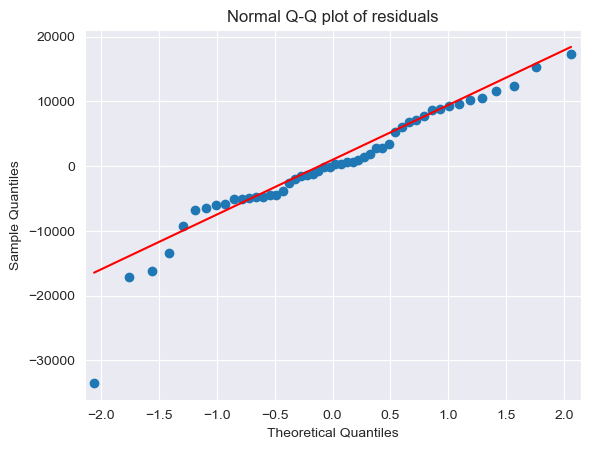

In [28]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

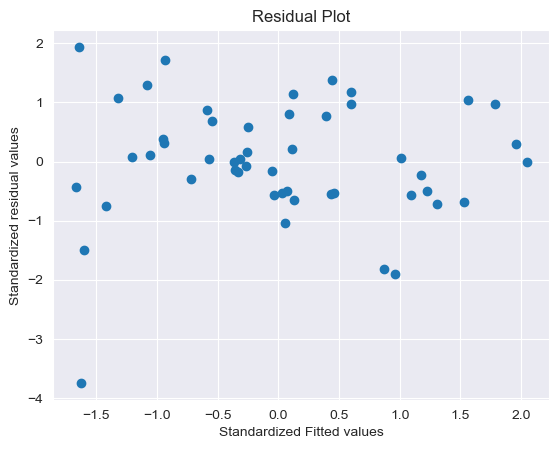

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

eval_env: 1


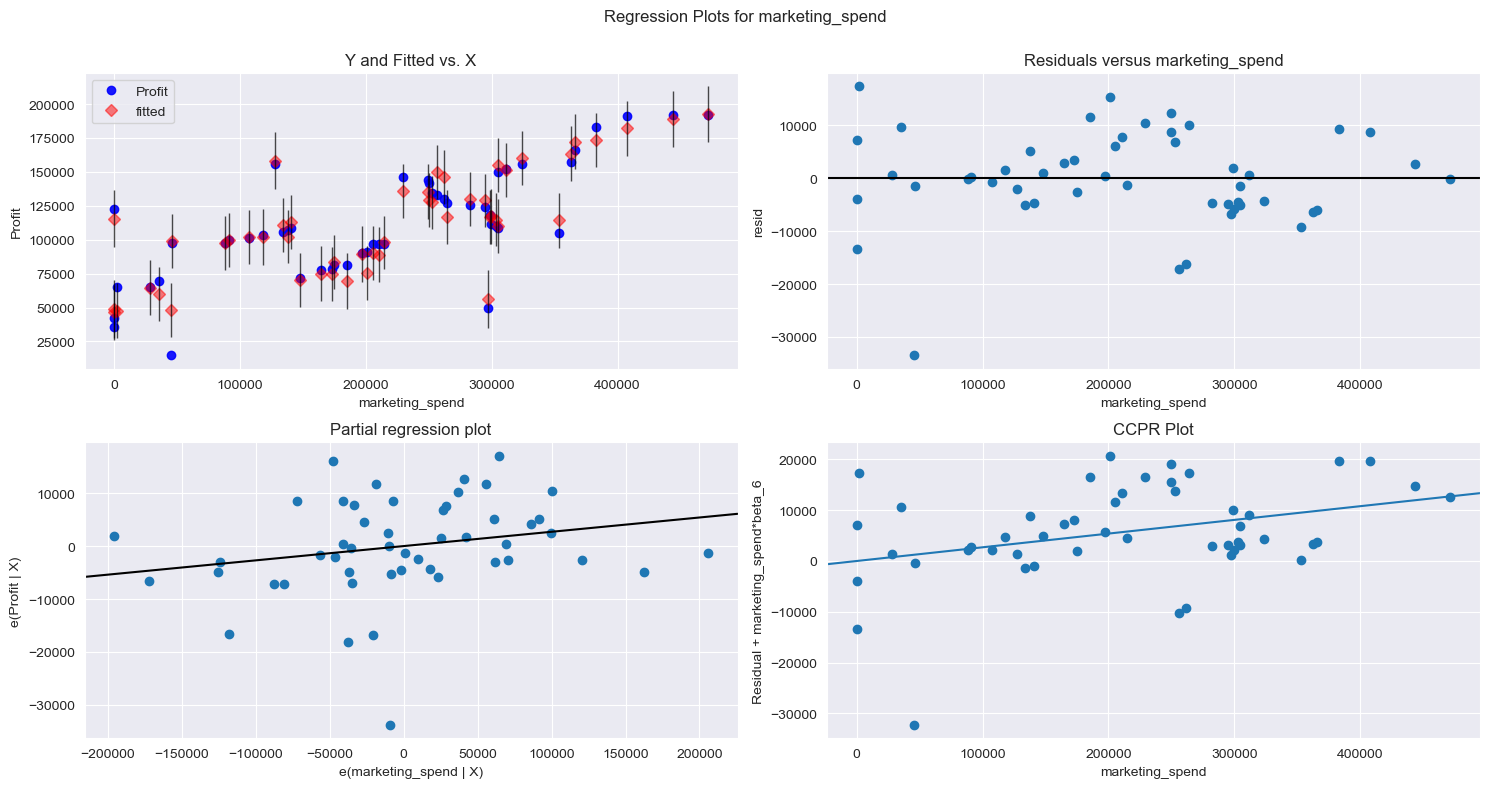

In [31]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "marketing_spend", fig=fig)
plt.show()

eval_env: 1


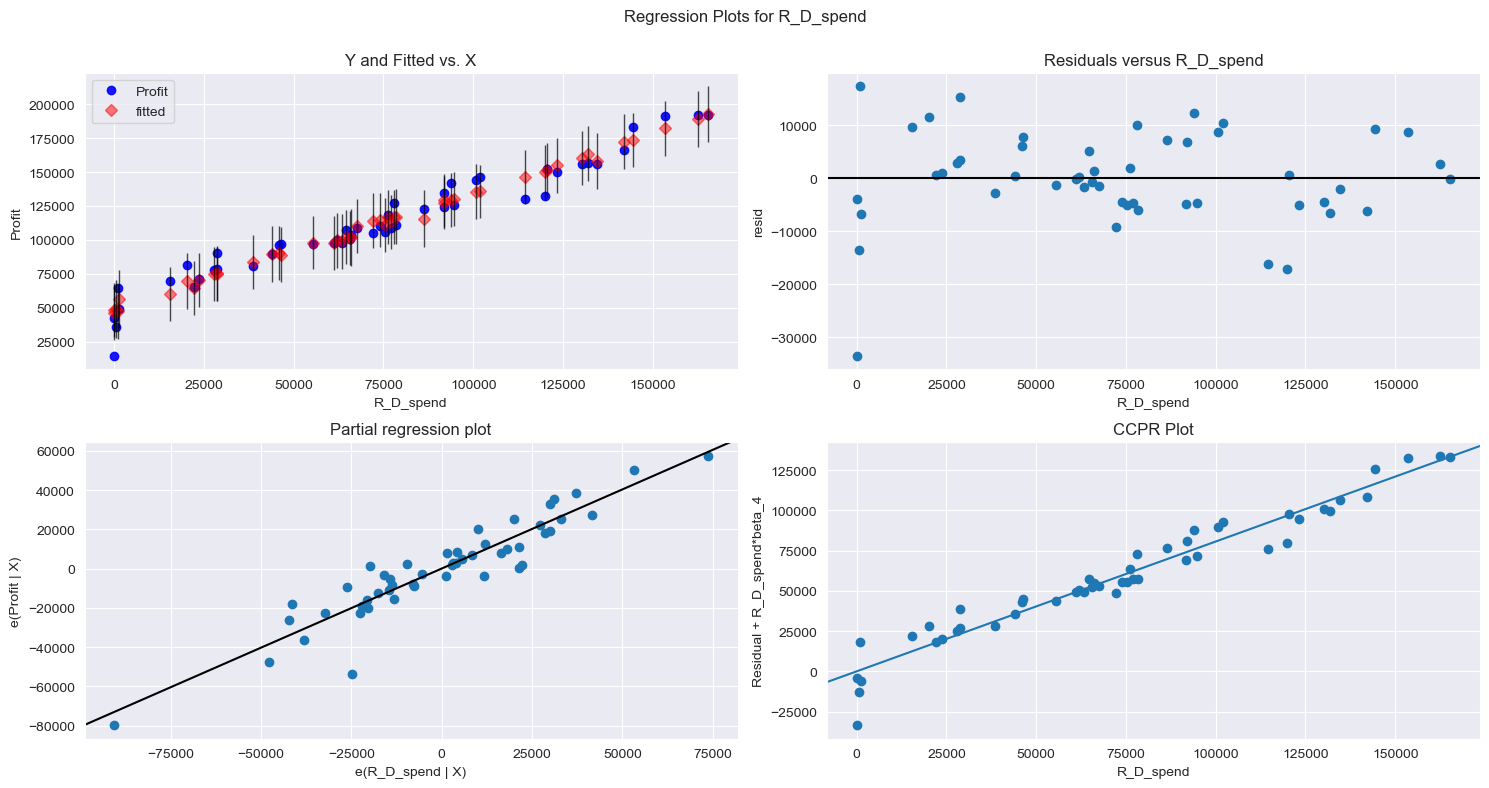

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "R_D_spend", fig=fig)
plt.show()

eval_env: 1


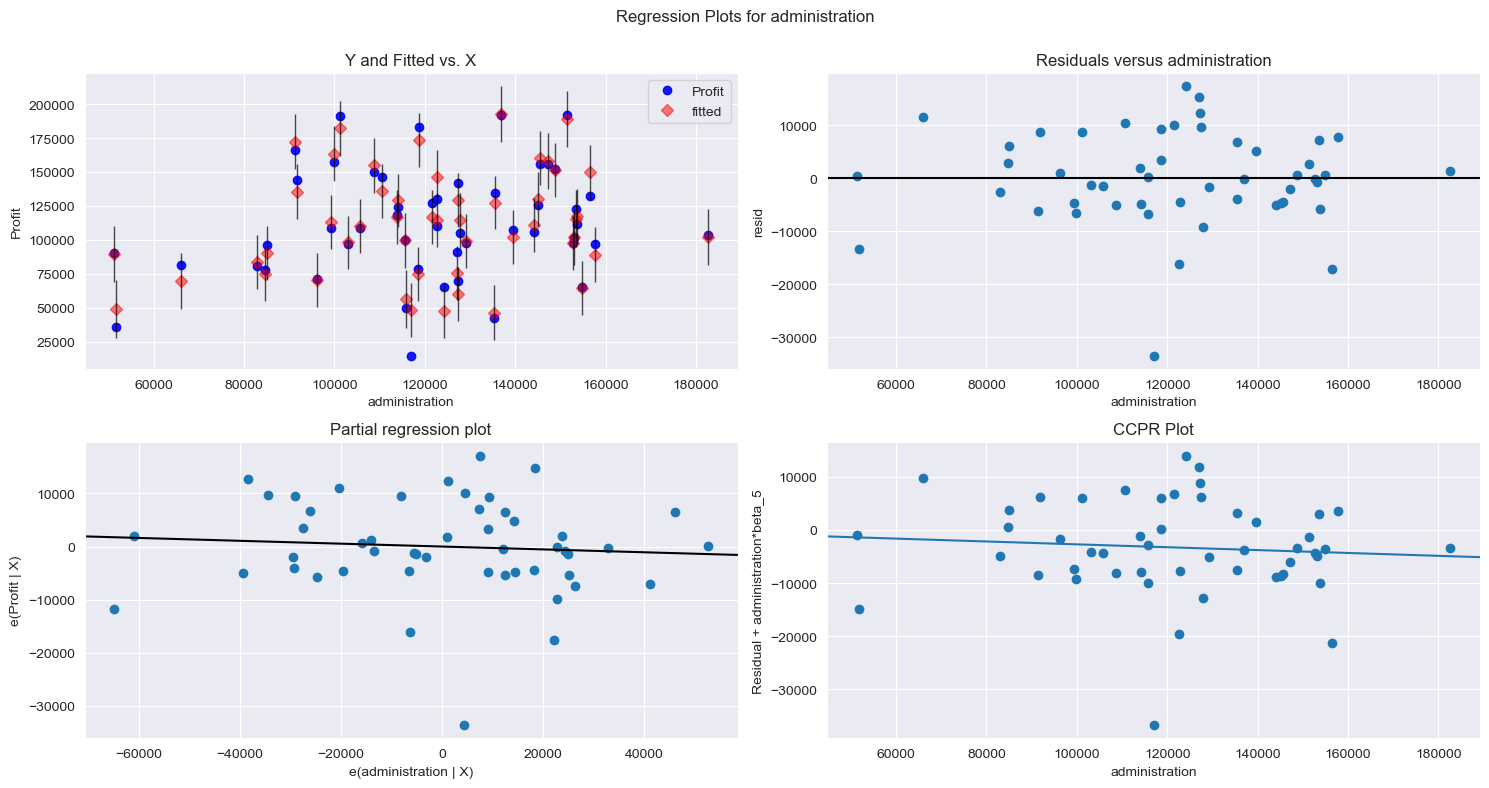

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "administration", fig=fig)
plt.show()

eval_env: 1


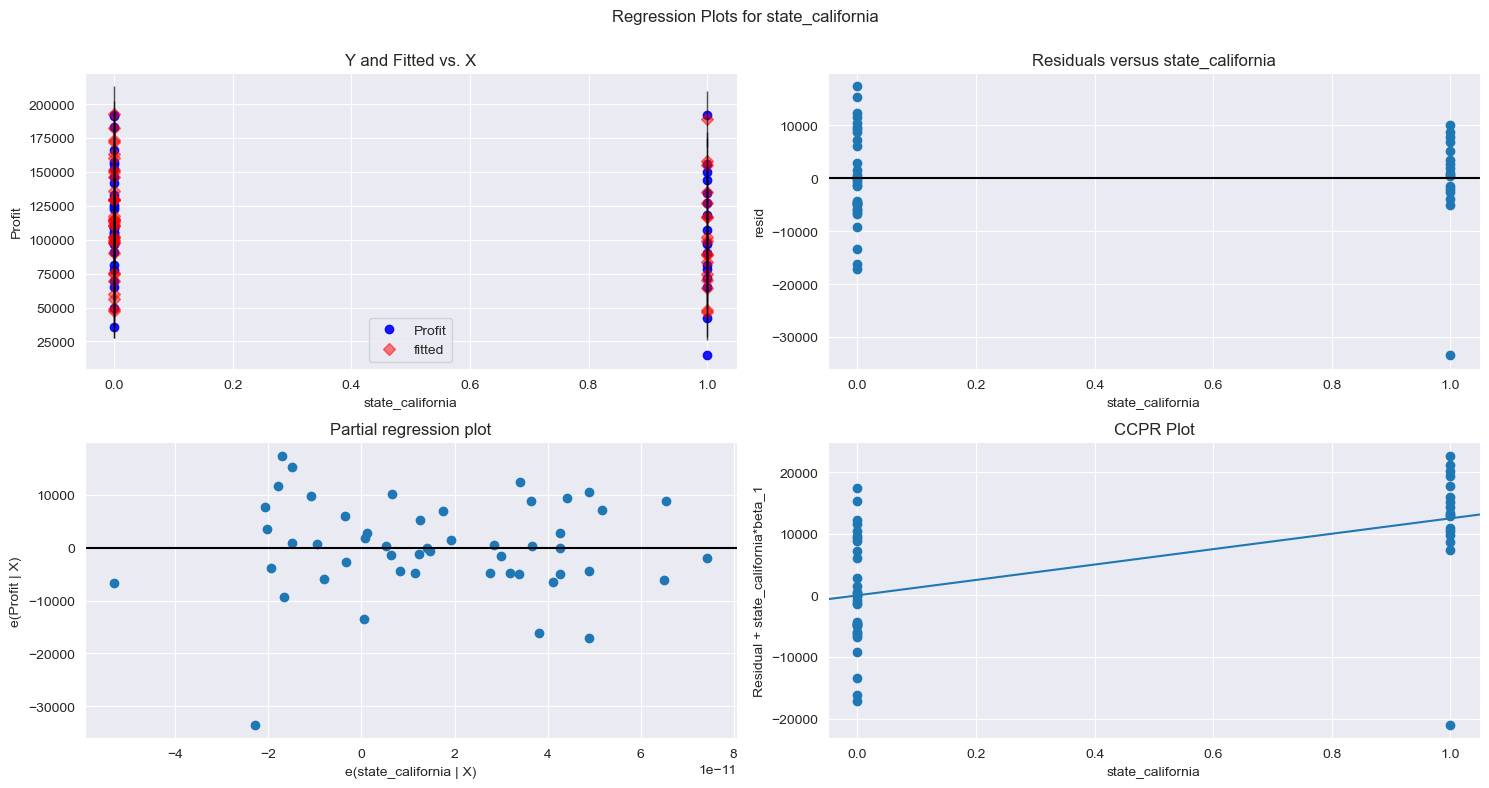

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "state_california", fig=fig)
plt.show()

eval_env: 1


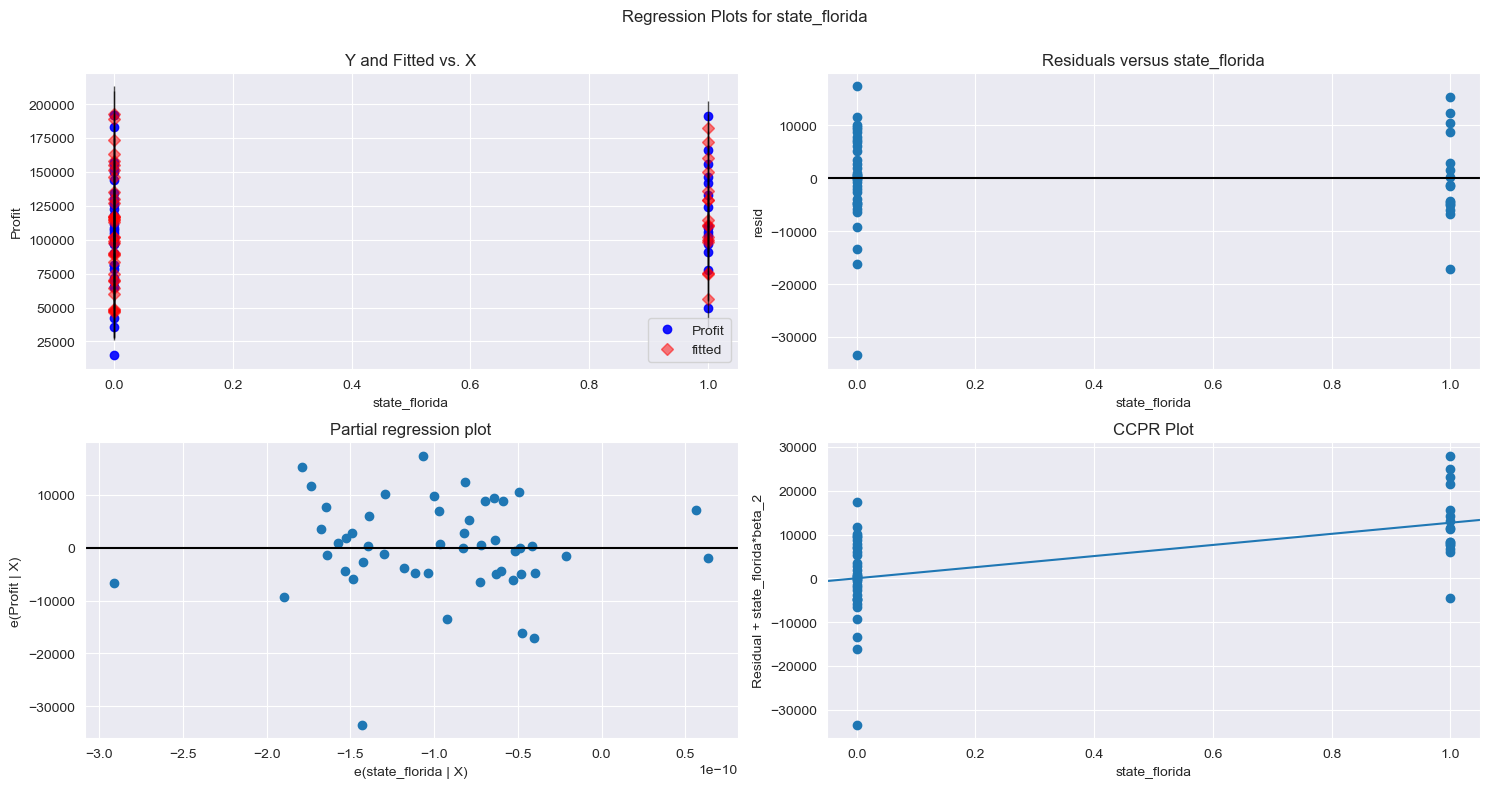

In [38]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "state_florida", fig=fig)
plt.show()

eval_env: 1


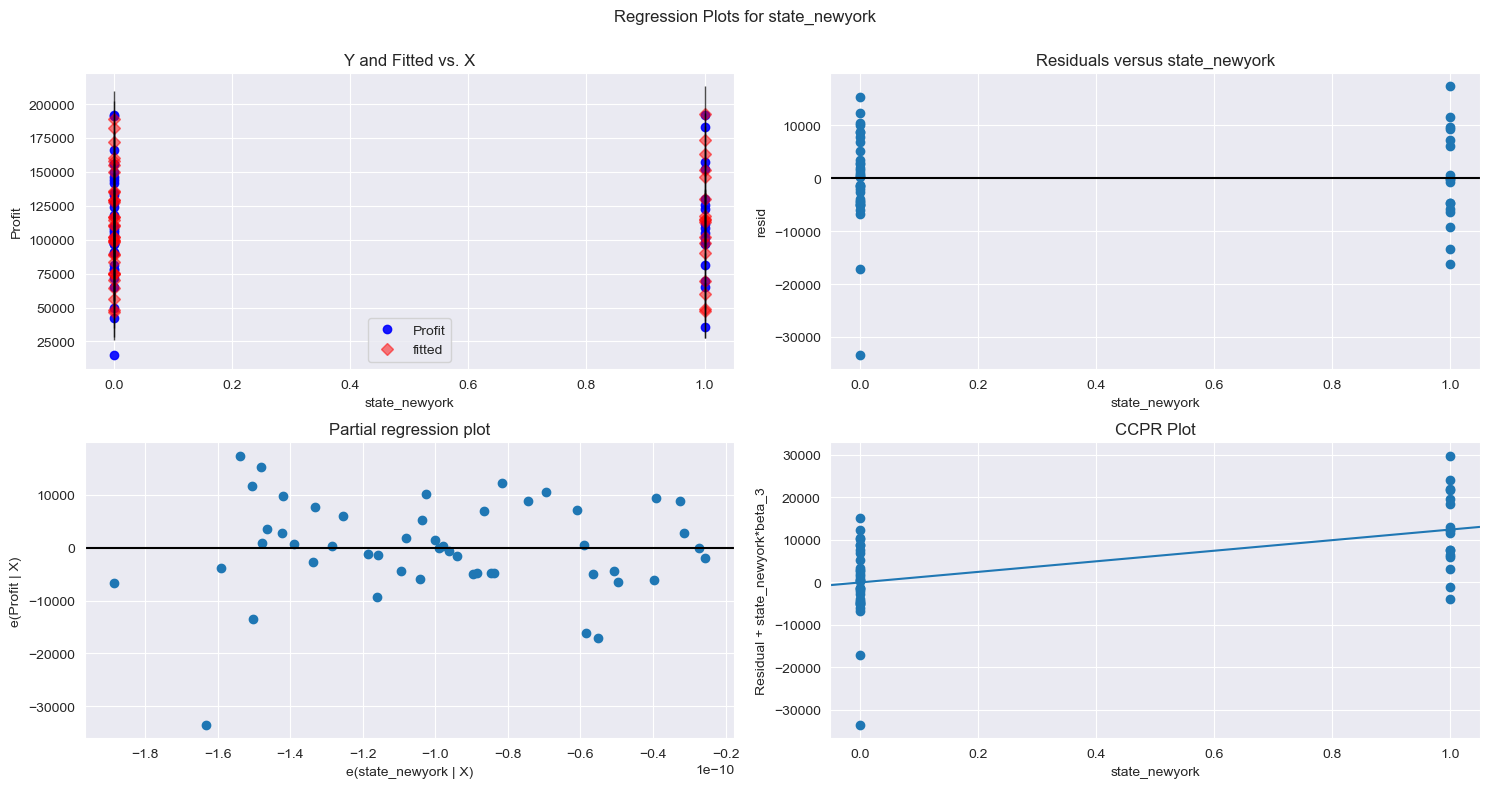

In [39]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "state_newyork", fig=fig)
plt.show()

### Cook’s Distance

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

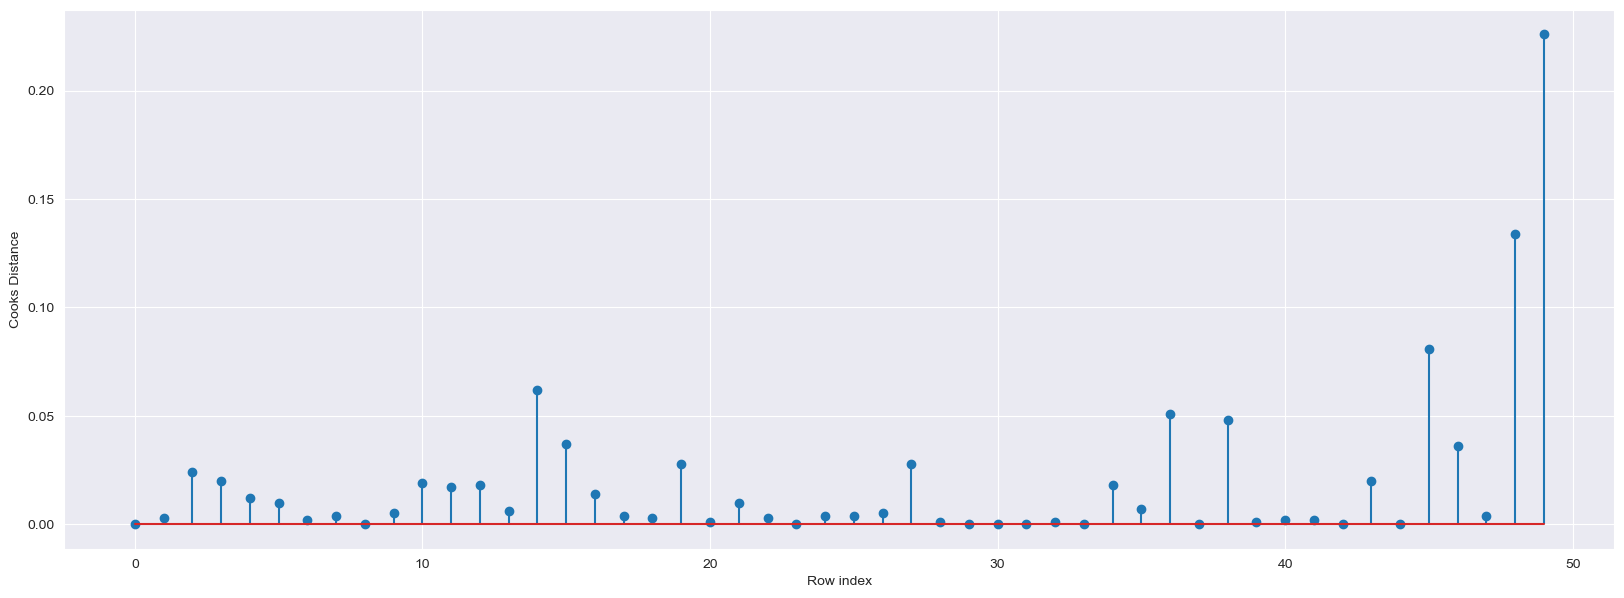

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.22625094499659282)

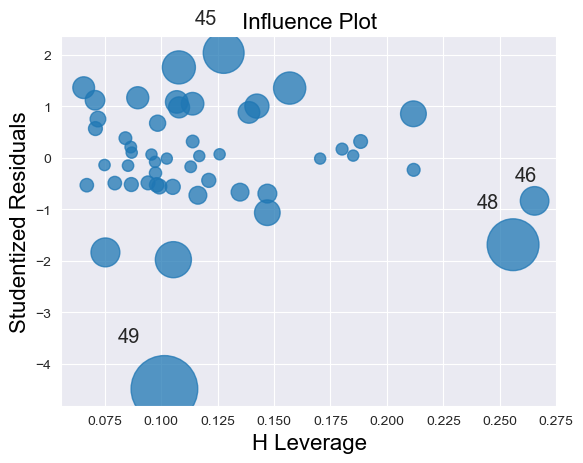

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

### Improving model

In [45]:
data_new=data.copy()
data_new

,state_california,state_florida,state_newyork,R_D_spend,administration,marketing_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94
5,0,0,1,131876.90,99814.71,362861.36,156991.12
6,1,0,0,134615.46,147198.87,127716.82,156122.51
7,0,1,0,130298.13,145530.06,323876.68,155752.60
8,0,0,1,120542.52,148718.95,311613.29,152211.77
9,1,0,0,123334.88,108679.17,304981.62,149759.96


In [46]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[49]],axis=0).reset_index(drop=True)
data1.head()

,state_california,state_florida,state_newyork,R_D_spend,administration,marketing_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [47]:
count = 0
model=smf.ols('Profit~state_california+state_florida+state_newyork+R_D_spend+administration+marketing_spend',data=data1).fit()
(c,_)=model.get_influence().cooks_distance
c
while np.max(c) > 0.5:
    model=smf.ols('Profit~state_california+state_florida+state_newyork+R_D_spend+administration+marketing_spend',data=data1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_new
    print(np.argmax(c) , np.max(c))
    count += 1
    print(count)
else:
    final_model=smf.ols('Profit~state_california+state_florida+state_newyork+R_D_spend+administration+marketing_spend',data=data1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9618082858227786


In [48]:
data1.shape

(49, 7)

In [49]:
predicted_profit = final_model.predict(data1)
pred_df = pd.DataFrame({'Profit_Actual' : data1.Profit, 'Profit_Predicted' : predicted_profit})
pred_df


,Profit_Actual,Profit_Predicted
0,192261.83,190158.286185
1,191792.06,188917.339413
2,191050.39,180356.022379
3,182901.99,171835.121622
4,166187.94,170611.039177
5,156991.12,161933.895088
6,156122.51,158918.600300
7,155752.60,159073.187404
8,152211.77,150652.118920
9,149759.96,155504.737225


In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Profit, predicted_profit))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.Profit, predicted_profit))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Profit, predicted_profit)))
print("R^2 Score :          ", metrics.r2_score(data1.Profit, predicted_profit))

Mean Absolute Error: 5904.117924691702
Mean Squared Error: 54511358.11008433
Root Mean Squared Error: 7383.180758323903
R^2 Score :           0.9618082858227786


In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.51e-29
Time:                        18:10:45   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
state_california  1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
state_florida     1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
state_newyork     1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
R_D_spend            0.7836      0.039     20.056      0.000       0.705       0.862
administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
marketing_spend      0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.15e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.93e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Building Model

In [52]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\HP\AppData\Local\Temp\ipykernel_2092\3294706051.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [53]:
data.head()

,state_california,state_florida,state_newyork,R_D_spend,administration,marketing_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [54]:
# Diving data into Predictors and Target Variable
X = data.drop('Profit', axis = 1).values
y = data.iloc[:,-1].values.reshape(-1,1)

In [55]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [56]:
# Checking splitted sets
print(X_train.shape,'X_Train data shape')
print( X_test.shape,'X_test data shape')
print(y_train.shape,'Y_Train data shape')
print(y_test.shape,'Y_test data shape')

(37, 6) X_Train data shape
(13, 6) X_test data shape
(37, 1) Y_Train data shape
(13, 1) Y_test data shape


In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
model.score(X_test,y_test)

0.9190778286373128

In [59]:
model.score(X_train,y_train)

0.9544301945833913